In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import tensorflow as tf
import numpy as np

In [3]:
model_path = r'...\vgg_model_final.h5'
model = tf.keras.models.load_model(model_path)

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(100, 100)
accuracy = []

def image_predict(paths):
    for i in range(len(paths)):
        sp = plt.subplot(3, 7, i + 1)
        img = mpimg.imread(paths[i])
        plt.imshow(img)
        img = img/255
        img = img.reshape((1,) + img.shape)
        img = tf.image.resize(img, (224, 224), method = tf.image.ResizeMethod.BILINEAR)
        img = tf.convert_to_tensor(img)
        if int(np.argmax(model.predict(img), axis = 1)) == 3 or 7:
            accuracy.append(1)
        plt.xlabel(int(np.argmax(model.predict(img), axis = 1)))
    print('Accuracy : ', len(accuracy)*100/len(paths), '%')
    accuracy.clear()

<Figure size 7200x7200 with 0 Axes>

Accuracy :  100.0 %


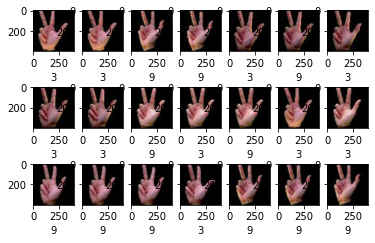

In [23]:
#blur images of class with abundant images
path = r'...'
files = np.array(os.listdir(path))
images = [os.path.join(path, fname) for fname in files]
image_predict(images)

Accuracy :  100.0 %


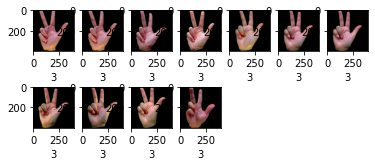

In [22]:
#Non-blur images of class with abundant images
path = r'...'
files = np.array(os.listdir(path))
images = [os.path.join(path, fname) for fname in files]
image_predict(images)

Accuracy :  100.0 %


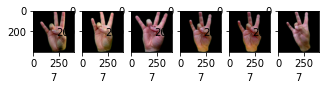

In [21]:
#Non-blur images of class with less images
path = r'...'
files = np.array(os.listdir(path))
images = [os.path.join(path, fname) for fname in files]
image_predict(images)